In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.constants import c

from tracking import *

In [2]:
path = 'ranging_qo100_20200614_1156.int16'
x = load_file(path)[2*(4*repeat_samples+calibration_RX_delay_samples):]

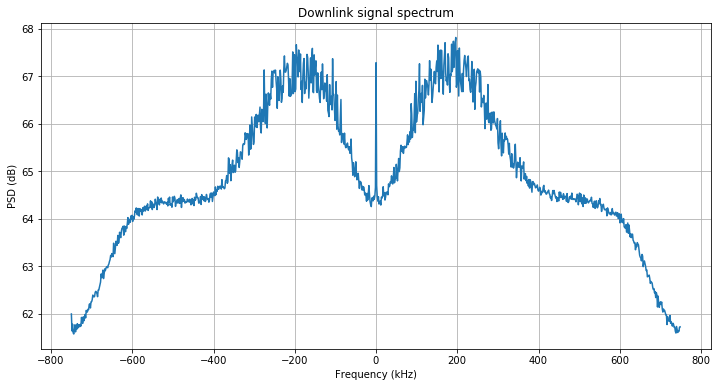

In [12]:
N = 1024
T = 3
M = int(np.ceil(T*fs/N))
y = x[:2*N*M].astype('float32').view('complex64').reshape((-1,N))
plt.figure(figsize = (12,6), facecolor = 'w')
f = np.fft.fftshift(np.average(np.abs(np.fft.fft(y))**2, axis = 0))
freq = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
plt.plot(freq * 1e-3, 10 * np.log10(f))
plt.title('Downlink signal spectrum')
plt.ylabel('PSD (dB)')
plt.xlabel('Frequency (kHz)')
plt.grid();